# **Calling and Analyzing Our Dataset in MySQL Workbrench via AWS RDS**


---
**Amazon Relational Database Service (RDS) is a managed SQL database service provided by Amazon Web Services (AWS).** Amazon RDS supports an array of database engines **to store and organize data.** It also helps with relational database management tasks, such as data migration, backup, recovery and patching.

Using this service, we will **create our dataset in our MySQL Workbrench and call this dataset from our AWS RDS service and perform analysis on the data.**


Firstly we will use **mysql.connector** library.Let's install library.

In [ ]:
pip install mysql.connector

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.9 MB 4.9 MB/s 
  Created wheel for mysql.connector: filename=mysql_connector-2.2.9-cp37-cp37m-linux_x86_64.whl size=247965 sha256=b90382b1c9df2080f05cdf340e11f6dfc201b3f4d21a891e49f100501320dd71
  Stored in directory: /root/.cache/pip/wheels/42/2f/c3/692fc7fc1f0d8c06b9175d94f0fc30f4f92348f5df5af1b8b7
Successfully built mysql.connector


We can see **Colab Notebook IP Adress.**

In [ ]:
!curl ipecho.net/plain

35.227.102.41

In [ ]:
import pandas as pd

**Host** is the link in the Endpoint section of the AWS RDS database

**User** is the name written in Master username in the configuration zone in AWS RDS Database.

**Password** is the password you typed when installing the AWS RDS Database.

**Database** is the name of the database that you have installed in MySQL Workbrench and that you want to analyze here.

In [ ]:
import mysql.connector
db = mysql.connector.connect(
    host ='database-awss.cfrtkmddesjw.us-east-1.rds.amazonaws.com',
    user='admin',
    password='Abcd.1234',
    database='classicmodels'
)

In [ ]:
mycursor = db.cursor()

Now we can do all **analysis,adding,deleting...**

In [ ]:
mycursor.execute("SELECT * FROM customers;")
data = []
for x in mycursor:
    data.append(x)
    print(x)

(103, 'Atelier graphique', 'Schmitt', 'Carine ', '40.32.2555', '54, rue Royale', None, 'Nantes', None, '44000', 'France', 1370, Decimal('21000.00'))
(112, 'Signal Gift Stores', 'King', 'Jean', '7025551838', '8489 Strong St.', None, 'Las Vegas', 'NV', '83030', 'USA', 1166, Decimal('71800.00'))
(114, 'Australian Collectors, Co.', 'Ferguson', 'Peter', '03 9520 4555', '636 St Kilda Road', 'Level 3', 'Melbourne', 'Victoria', '3004', 'Australia', 1611, Decimal('117300.00'))
(119, 'La Rochelle Gifts', 'Labrune', 'Janine ', '40.67.8555', '67, rue des Cinquante Otages', None, 'Nantes', None, '44000', 'France', 1370, Decimal('118200.00'))
(121, 'Baane Mini Imports', 'Bergulfsen', 'Jonas ', '07-98 9555', 'Erling Skakkes gate 78', None, 'Stavern', None, '4110', 'Norway', 1504, Decimal('81700.00'))
(124, 'Mini Gifts Distributors Ltd.', 'Nelson', 'Susan', '4155551450', '5677 Strong St.', None, 'San Rafael', 'CA', '97562', 'USA', 1165, Decimal('210500.00'))
(125, 'Havel & Zbyszek Co', 'Piestrzeniewic

In [ ]:
columns = [i[0] for i in mycursor.description]

In [ ]:
columns

['customerNumber',
 'customerName',
 'contactLastName',
 'contactFirstName',
 'phone',
 'addressLine1',
 'addressLine2',
 'city',
 'state',
 'postalCode',
 'country',
 'salesRepEmployeeNumber',
 'creditLimit']

We can convert **Pandas Dataframe.**

In [ ]:
df = pd.DataFrame(data=data, columns=[columns])
df.head()

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
0,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",None,Nantes,None,44000,France,1370.0,21000.00
1,112,Signal Gift Stores,King,Jean,7025551838,8489 Strong St.,None,Las Vegas,NV,83030,USA,1166.0,71800.00
2,114,"Australian Collectors, Co.",Ferguson,Peter,03 9520 4555,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,1611.0,117300.00
3,119,La Rochelle Gifts,Labrune,Janine,40.67.8555,"67, rue des Cinquante Otages",None,Nantes,None,44000,France,1370.0,118200.00
4,121,Baane Mini Imports,Bergulfsen,Jonas,07-98 9555,Erling Skakkes gate 78,None,Stavern,None,4110,Norway,1504.0,81700.00


We can look at **which cities** we have the most customers in.

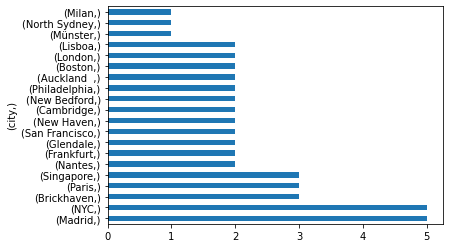

In [ ]:
df['city'].value_counts()[:20].plot(kind='barh')

In [ ]:
print("Credit limit max value is ",df["creditLimit"].max()[0],", and Credit limit min value is ",df["creditLimit"].min()[0])

Credit limit max value is  227600.00 , and Credit limit min value is  0.00


In [ ]:
print("Avarage of Credit limit is ",df["creditLimit"].mean()[0])

Avarage of Credit limit is  67659.01639344262
